# <center>Assignment 2</center> 
### <center>Lasso Regression </center>

In [1]:
#Task 1 
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

#Task 2 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],diabetes['target'], random_state=1410)
#print(X_train)


In [2]:
#Finding R^2 values of training and test set
from sklearn.linear_model import Lasso 
lassoModel = Lasso() # using default parameters 
lassoModel.fit(X_train, y_train) 
training_r2 = lassoModel.score(X_train, y_train) 
print("The training R^2 for the data imported from sklearn is: ",training_r2) 
test_r2 = lassoModel.score(X_test,y_test)
print("\nThe test R^2 for the data imported from sklearn is: ",test_r2)

The training R^2 for the data imported from sklearn is:  0.3700692463049169

The test R^2 for the data imported from sklearn is:  0.3493317545285277


In [3]:
#Task 3 answers
print("\nThis model uses 10 feature variables.\n\nNamely: 'age'\t'sex'\t'bmi'\t'bp'\t's1'\t's2'\t's3'\t's4'\t's5'\t's6'")


This model uses 10 feature variables.

Namely: 'age'	'sex'	'bmi'	'bp'	's1'	's2'	's3'	's4'	's5'	's6'


In [4]:
#Task 4 importing original dataset 
import numpy as np
X = np.genfromtxt("diabetes.txt",usecols = range(0,9))
y = np.genfromtxt("diabetes.txt", usecols = 10)

In [5]:
#Task 5
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1410)
#print(X_train)

In [6]:
#Task 6
lassoModel = Lasso() # using default parameters for the original dataset
lassoModel.fit(X_train, y_train) 
training_r2 = lassoModel.score(X_train, y_train) 
print("The training R^2 for the original data is: ",training_r2) 
test_r2 = lassoModel.score(X_test,y_test)
print("\nThe test R^2 for the orginal data is: ",test_r2)

The training R^2 for the original data is:  0.5242124054175406

The test R^2 for the orginal data is:  0.45754404781376157


    It is been observed that the R^2 value of training and test set computed from the sklearn diabetes dataset has a lower value than the orginal dataset downloaded from the internet.  

In [7]:
#Task 7
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = sc.transform(X_train)

X_test = sc.fit_transform(X_test)
X_test = sc.transform(X_test)

In [8]:
#Task 8
lassoModel = Lasso()
lassoModel.fit(X_train, y_train) 
training_r2 = lassoModel.score(X_train, y_train) 
print("The training R^2 for the original data is: ",training_r2) 
test_r2 = lassoModel.score(X_test,y_test)
print("\nThe test R^2 for the orginal data is: ",test_r2)

The training R^2 for the original data is:  0.47293122707416335

The test R^2 for the orginal data is:  0.3697912870231459


    The current results are closer to those in In[2], since the reason for different results in In[2] and In[6] was that the former were for normalized data while the latter were for the original data. So we get a closer value to In[2] after using StandardScaler().

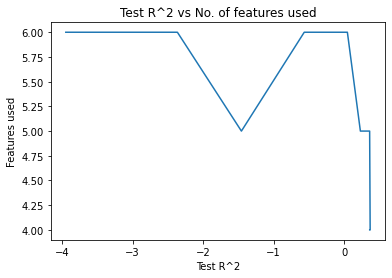

In [9]:
#Task 9
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectFromModel
NoOfFeatures = []
test_r2 = []
feature_names = np.array(diabetes.feature_names[1:])
for i in range(1,15):
    lassoModel = Lasso(alpha = i*0.10)  
    selector = SelectFromModel(lassoModel).fit(X_train, y_train)
    #print("Features selected by SelectFromModel: " f"{feature_names[selector.get_support()]}")
    NoOfFeatures.append(len(feature_names[selector.get_support()]))
    lassoModel.fit(X_train, y_train) 
    test_r2.append(lassoModel.score(X_test,y_test))
plt.plot(test_r2, NoOfFeatures)
plt.title("Test R^2 vs No. of features used")
plt.xlabel("Test R^2")
plt.ylabel("Features used")
plt.show()

    The graph shows that by varying the parameter (alpha) in the Lasso model, the number of features used (i.e., Non zero coefficients) varies accordingly. We can also infer that the change in the number of features used also produces variation in the test R^2 value. The lesser the features used, more significant the model becomes. Nevertheless, we cannot take a single feature into consideration in real-time which over-estimates the efficiency of the model.

In [10]:
#Task 10
from sklearn.model_selection import cross_val_score
from statistics import mean 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of alpha
alpha = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X_train, y_train, cv = 10)
    cross_val_scores_lasso.append(mean(scores)*100) 
    alpha.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 48.556955184052306
0.5 : 46.43589445471688
0.75 : 45.023287041273015
1.0 : 44.194385001705996
1.25 : 43.99405779196041
1.5 : 43.750655179152446
1.75 : 43.45875887912071
2.0 : 43.11442108841178


In [11]:
#Lasso regression after selecting the regularisation parameter
lasso_Chosen = Lasso(alpha = 2) 
lasso_Chosen.fit(X_train, y_train) 
  
# Evaluating the Lasso Regression model 
training_r2 = lasso_Chosen.score(X_train, y_train) 
print("The training R^2 for the original data is: ",training_r2) 
test_r2 = lasso_Chosen.score(X_test,y_test)
print("\nThe test R^2 for the orginal data is: ",test_r2)

The training R^2 for the original data is:  0.46120493418459885

The test R^2 for the orginal data is:  0.35181905954936143


In [12]:
selector = SelectFromModel(lasso_Chosen).fit(X_train, y_train)
print("Features selected by SelectFromModel: " f"{feature_names[selector.get_support()]}")
NoOfFeatures = len(feature_names[selector.get_support()])
print("Number of features used:", NoOfFeatures)

Features selected by SelectFromModel: ['bmi' 'bp' 's5' 's6']
Number of features used: 4


## <center>Inductive conformal prediction</center>

In [13]:
#Task 11(a)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1410)
X_train_proper, X_calibration, y_train_proper, y_calibration = train_test_split(X_train,y_train, test_size = 99, random_state=1410)

    In the above cell, I splited the training set into calibration set with size 99 and training proper set with the remaining sets available. The random state is specified with respect to my DOB

In [14]:
#Task 11(b)
X_train_proper = sc.fit_transform(X_train_proper)
X_train_proper = sc.transform(X_train_proper)

X_calibration = sc.fit_transform(X_calibration)
X_calibration = sc.transform(X_calibration)

X_test = sc.fit_transform(X_test)
X_test = sc.transform(X_test)

    Here, I preprocessed the training set proper, calibration set, and test set using StandardScaler.

In [15]:
#Task 11(c)
#cell to predict the value of yhat 
lasso_Chosen.fit(X_train_proper, y_train_proper) 
yhat = lasso_Chosen.predict(X_train_proper)
sorted_array = np.sort(abs(y_train_proper - yhat)) #alpha values sorted

    Sorted_array contains the alpha values |y - yhat| sorted in ascending order

In [16]:
#Calcutaion for k and C values with respect to different epsilon values(significance level)
import math
epsilon = [0.05, 0.2]
k1 = math.ceil((1 - epsilon[0]) * (len(X_calibration)+1))
c1 = sorted_array[k1]
k2 = math.ceil((1 - epsilon[1]) * (len(X_calibration)+1))
c2 = sorted_array[k2]
#print("\n",k1,"\n",c1)
#print("\n",k2,"\n",c2)

In [17]:
#Finding the prediction intervals from the obtained C value

lasso_Chosen.fit(X_test, y_test) 
yhat_test = lasso_Chosen.predict(X_test)

prediction_interval1 = []
for i in range(0,len(yhat_test)):
    prediction_interval1.append([yhat_test[i] - c1, yhat_test[i] + c1])

print("The prediction intervals for significance level 5% is: \n\n",prediction_interval1)
prediction_interval2 = []
for i in range(0,len(yhat_test)):
    prediction_interval2.append([yhat_test[i] - c2, yhat_test[i] + c2])
print("\n\nThe prediction intervals for significance level 5% is: \n\n",prediction_interval2)
lower_interval1 = []
upper_interval1 = []
for i in range(0,len(yhat_test)):
    lower_interval1.append(yhat_test[i] - c1)
    upper_interval1.append(yhat_test[i] + c1)
lower_interval2 = []
upper_interval2 = []
for i in range(0,len(yhat_test)):
    lower_interval2.append(yhat_test[i] - c2)
    upper_interval2.append(yhat_test[i] + c2)

The prediction intervals for significance level 5% is: 

 [[122.45117740302089, 192.3707330206173], [184.51573925223101, 254.43529486982743], [125.5926643077969, 195.5122199253933], [111.8491460192231, 181.76870163681951], [189.72455751591326, 259.6441131335097], [54.93318858195107, 124.85274419954749], [83.4032266907451, 153.32278230834152], [85.64566740178577, 155.5652230193822], [90.39547729077731, 160.31503290837372], [162.59040896253828, 232.5099645801347], [113.8256909416724, 183.74524655926882], [171.27260592851871, 241.19216154611513], [27.303681434568716, 97.22323705216513], [156.19049071862298, 226.1100463362194], [35.002490046694675, 104.92204566429109], [157.4455065679258, 227.36506218552222], [140.2584888501059, 210.1780444677023], [159.81586048341978, 229.7354161010162], [95.63816807684611, 165.55772369444253], [139.82831336220454, 209.74786897980096], [171.05508860490397, 240.9746442225004], [131.68405970129663, 201.60361531889305], [112.56792774656253, 182.4874833641589

In [18]:
count_test_error1 = 0

for i in range(0,len(lower_interval1)-1):
    if y_test[i] < lower_interval1[i] or y_test[i] > upper_interval1[i]:
            count_test_error1 = count_test_error1 + 1
test_error1 = count_test_error1 / len(y_test)
print("The test error rate for significance level 5% is: ",test_error1)

count_test_error2 = 0

for i in range(0,len(lower_interval2)-1):
    if y_test[i] < lower_interval2[i] or y_test[i] > upper_interval2[i]:
            count_test_error2 = count_test_error2 + 1
test_error2 = count_test_error2 / len(y_test)
print("The test error rate for significance level 20% is: ",test_error2)

The test error rate for significance level 5% is:  0.5675675675675675
The test error rate for significance level 20% is:  0.6126126126126126
